# Importing Libraries
We import `numpy` for numerical computations and `matplotlib.pyplot` for plotting.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Generating Data
Generate 100 data points with:
- x from Uniform(0, 2π)
- noise from N(0, 0.2)
- y = sin(x) + noise

In [3]:
np.random.seed(42)
N = 100
x = np.random.uniform(0, 2*np.pi, N)  # x ~ Uniform(0, 2*pi)
noise = np.random.normal(0, 0.1, N)     # noise ~ N(0, 0.1)
y = np.sin(x) + noise                   # y = sin(x) + noise
print("Data Generated Successfully")
print("----------------------")
print(f"x shape: {x.shape}, y shape: {y.shape}")
print(f"First 5 x-values: {x[:5]}")
print(f"First 5 y-values: {y[:5]}")


Data Generated Successfully
----------------------
x shape: (100,), y shape: (100,)
First 5 x-values: [2.35330497 5.97351416 4.59925358 3.76148219 0.98029403]
First 5 y-values: [ 0.71785173 -0.33464618 -0.98443094 -0.77970215  0.80869393]


# Defining Helper Functions
The functions below:
- Create vertical stacked arrays of x raised to powers.
- Fit the polynomial using least squares.
- Predict values using the polynomial coefficients.

In [4]:
def polynomial_features(x, degree):
    return np.vstack([x**i for i in range(degree+1)]).T
def fit_polynomial(x_train, y_train, degree):
    X_design = polynomial_features(x_train, degree)
    w, _, _, _ = np.linalg.lstsq(X_design, y_train, rcond=None)
    return w
def predict_polynomial(x, w):
    degree = len(w) - 1
    X_design = polynomial_features(x, degree)
    return X_design @ w

# 2) & 3) Setting Up 5-Fold Cross Validation

In [5]:
K = 5
indices = np.arange(N)
fold_sizes = np.full(K, N // K)
fold_sizes[:N % K] += 1
folds = []
current = 0
for fold_size in fold_sizes:
    folds.append(indices[current:current + fold_size])
    current += fold_size
print("5-Fold CV Setup Done")
print("----------------------------------------------")
for i, f in enumerate(folds):
    print(f"Fold {i+1} indices: {f}")
print()

5-Fold CV Setup Done
----------------------------------------------
Fold 1 indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Fold 2 indices: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Fold 3 indices: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
Fold 4 indices: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Fold 5 indices: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]



# Cross Validation: Evaluate Polynomial Degrees 0 to 5

In [6]:
degrees = range(5)
avg_mse_per_degree = []
for d in degrees:
    fold_mses = []
    for k in range(K):
        test_idx = folds[k]
        train_idx = np.concatenate([folds[i] for i in range(K) if i != k])
        x_train, y_train = x[train_idx], y[train_idx]
        x_test, y_test = x[test_idx], y[test_idx]
        w = fit_polynomial(x_train, y_train, d)
        y_pred = predict_polynomial(x_test, w)
        mse = np.mean((y_test - y_pred)**2)
        fold_mses.append(mse)
    avg_mse = np.mean(fold_mses)
    avg_mse_per_degree.append(avg_mse)
best_degree = degrees[np.argmin(avg_mse_per_degree)]
print(f"Best degree: {best_degree}")

Best degree: 3


# 4) Visualizing the Plot

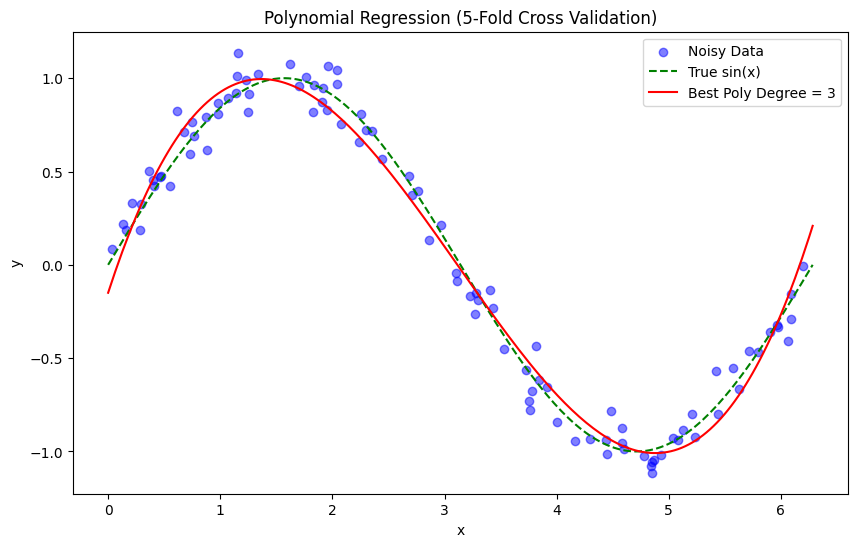

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue', alpha=0.5, label="Noisy Data")
x_plot = np.linspace(0, 2*np.pi, 200)
y_true = np.sin(x_plot)
plt.plot(x_plot, y_true, 'g--', label="True sin(x)")
w_best = fit_polynomial(x, y, best_degree)
y_fit = predict_polynomial(x_plot, w_best)
plt.plot(x_plot, y_fit, 'r-', label=f"Best Poly Degree = {best_degree}")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Regression (5-Fold Cross Validation)")
plt.legend()
plt.show()